### Summative Assessment 1

A study was undertaken to compare the mean time spent on cell phones by male and female college students per week. 50 male and 50 female students were selected from Midwestern University and the number of hours per week spent talking on their cell phones determined. The result in hours are shown in Table 10.6. It is desired to test H_0 : μ_1 = μ_2 versuse H_1 : μ_1 =/ μ_2 based on these samples.

**Table 10.6 Hours spent talking on cell phone for males and females at Midwestern University**

In [28]:
import numpy as np
import pandas as pd

males = [12, 7, 7, 10, 8, 10, 11, 9, 9, 13, 4, 9, 12, 11, 9, 9, 7, 12, 10, 13, 
         11, 10, 6, 12, 11, 9, 10, 12, 8, 9, 13, 10, 9, 7, 10, 7, 10, 8, 11, 10, 
         11, 7, 15, 8, 9, 9, 11, 13, 10, 13]
females = [11, 10, 11, 10, 11, 12, 12, 10, 9, 9, 9, 10, 8, 7, 12, 9, 7, 8, 9, 8, 
           7, 7, 9, 9, 12, 10, 9, 13, 9, 9, 10, 9, 6, 12, 8, 11, 8, 8, 11, 12, 
           9, 10, 11, 14, 12, 7, 11, 10, 9, 11]

table = np.column_stack((males,females))

df = pd.DataFrame(table, columns=['Males','Females'])

df.head()

,Males,Females
0,12,11
1,7,10
2,7,11
3,10,10
4,8,11


In [30]:
mean_males = np.mean(males)
mean_females = np.mean(females)
std_males = np.std(males, ddof=1)
std_females = np.std(females, ddof=1)

mean_males, std_males, mean_females, std_females

(9.82, 2.154160663289836, 9.7, 1.7756861278080076)

(10 Points) 1. Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.

#### Hypotheses
- **Null Hypothesis** ($H_{0}$): There is no difference in the mean time spent on cellphones by male and female students, i.e., $μ_{1}$ = $μ_{2}$, where $μ_{1}$, is the mean for males and $μ_{2}$ is the mean for females.
- **Alternative Hypothesis** ($H_{1}$): There is a difference in the meantime spent on cell phones by male and female students, i.e. $μ_{1}$ $\neq$ $μ_{2}$.

This is a two-tailed test to detect whether it is that males spend more or less time than females.

A significance level (α) of 0.05 is typically chosen so that there is a 5% risk of rejecting the null hypothesis when it is actually true

We will use a two-sample t-test since we have two independent samples (Males and Females).

Additionally, given that we cannot assume equal variances for the two groups, we should perform **Welch's t-test**, which adjusts for unequal variances.

##### To make the decision of rejecting the null hypothosis or not:
- If p $\geq$ α, reject the null hypothesis and conclude that there is a significant difference in mean time.
- If p > α, fail to reject the null hypothesis and conclude there is no significant evidence of a difference.

In [22]:
from scipy.stats import ttest_ind

def hypothesis_test_rationale(male_data, female_data, alpha=0.05):
    
    t_stat, p_value = ttest_ind(male_data, female_data, equal_var=False)  # Welch's t-test
    
    if p_value < alpha:
        decision = "Reject the null hypothesis (H0). There is a significant difference in the mean time spent on cell phones between males and females."
    else:
        decision = "Fail to reject the null hypothesis (H0). There is no significant evidence of a difference in the mean time spent on cell phones between males and females."
    
    # Rationale output
    rationale = {
        "Null Hypothesis (H0)": "μ1 = μ2 (No difference in mean time spent on cell phones)",
        "Alternative Hypothesis (H1)": "μ1 ≠ μ2 (There is a difference in mean time spent on cell phones)",
        "Test Type": "Two-sample t-test (Welch's t-test)",
        "Significance Level (α)": alpha,
        "t-Statistic": t_stat,
        "p-Value": p_value,
        "Decision": decision
    }
    return rationale

test_rationale = hypothesis_test_rationale(males, females)
test_rationale

{'Null Hypothesis (H0)': 'μ1 = μ2 (No difference in mean time spent on cell phones)',
 'Alternative Hypothesis (H1)': 'μ1 ≠ μ2 (There is a difference in mean time spent on cell phones)',
 'Test Type': "Two-sample t-test (Welch's t-test)",
 'Significance Level (α)': 0.05,
 't-Statistic': 0.30394907866566184,
 'p-Value': 0.7618345408177143,
 'Decision': 'Fail to reject the null hypothesis (H0). There is no significant evidence of a difference in the mean time spent on cell phones between males and females.'}

**Decision**:  Since the p-value (0.762) is greater than the significance level (0.05), we fail to reject the null hypothesis. This indicates that there is no significant evidence to suggest a difference in the mean time spent on cell phones between male and female college students.

(30 points) 2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?

#### Analysis:
1. **p-value**:
- The calculated p-value for the two-sample t-test (Welch's t-test) is **0.762**.
2. **Interpretation**:
- The p-value represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true. In this case, the p-value of 0.762 is much higher than the significance level 0f 0.05.

#### Recommendation:
Since the p-value (0.762) is **greater than** the significants level (0.05), the **null hypothesis cannot be rejected**. This implies that there is **no statistically significant difference** in the mean time spent on cellphones between male and female college students at Midwestern University.

The recommendation for the researcher is to conclude that the data do not provide sufficient evidence to suggest a difference in cellphone usage time between the two groups. if further investigation is desired, the researcher could consider a larger sample size or additional variable that might influence cell phone usage.

(10 points) 3. Provide descriptive statistical summaries of the data for each gender category.

In [38]:
data = {
    "Gender": ["Males", "Females"],
    "Mean": [np.mean(males), np.mean(females)],
    "Standard Deviation": [np.std(males, ddof=1), np.std(females, ddof=1)],
    "Minimum": [np.min(males), np.min(females)],
    "Maximum": [np.max(males), np.max(females)],
    "Count": [len(males), len(females)],
    "Median": [np.median(males), np.median(females)],
    "25th Percentile": [np.percentile(males, 25), np.percentile(females, 25)],
    "75th Percentile": [np.percentile(males, 75), np.percentile(females, 75)],
}

# Convert to DataFrame
descriptive_stats_df = pd.DataFrame(data)
descriptive_stats_df.transpose()


,0,1
Gender,Males,Females
Mean,9.82,9.7
Standard Deviation,2.154161,1.775686
Minimum,4,6
Maximum,15,14
Count,50,50
Median,10.0,9.5
25th Percentile,9.0,9.0
75th Percentile,11.0,11.0


(10 points) 4. What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?

In [74]:
from scipy.stats import t

# Mean, Standard Deviation for both Males and Females was done above.

n_males = len(males)
n_females = len(females)

df_males = n_males - 1
df_females = n_females - 1

alpha = 0.05
t_critical_males = t.ppf(1 - alpha/2, df_males)
t_critical_females = t.ppf(1 - alpha/2, df_females)

margin_error_males = t_critical_males * (std_males / np.sqrt(n_males))
ci_males = (mean_males - margin_error_males, mean_males + margin_error_males)

margin_error_females = t_critical_females * (std_females / np.sqrt(n_females))
ci_females = (mean_females - margin_error_females, mean_females + margin_error_females)

# Confidence interval for the difference between means
pooled_se = np.sqrt((std_males**2 / n_males) + (std_females**2 / n_females))
df_diff = min(df_males, df_females)
t_critical_diff = t.ppf(1 - alpha/2, df_diff)
margin_error_diff = t_critical_diff * pooled_se
ci_diff = ((mean_males - mean_females) - margin_error_diff, (mean_males - mean_females) + margin_error_diff)

#for printing
print("The 95% confidence interval for the population of each gender category")
print("\033[1m" + "Males : " + f"\033[0;0m {ci_males}")
print("\033[1m" + "Females : " + f"\033[0;0m {ci_females}")
print()

print("The 95% confidence interval for the difference between the means of the two populations")
print('\033[1m' + "CI_Diff : " + f"\033[0;0m {ci_diff}")

The 95% confidence interval for the population of each gender category
Males :  (9.207794313260433, 10.432205686739568)
Females :  (9.195355586129574, 10.204644413870424)

The 95% confidence interval for the difference between the means of the two populations
CI_Diff :  (-0.6733862787614163, 0.9133862787614183)


(20 points) 5. Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

#### YES

There is a case to be made for larger samples sizes and further testing regarding the time spent on cellphones with the following:
1. **Current Sample Size Limitations**

With only 50 male and 50 female participants, the sample size is not large enough (as per the recommendations earlier) to detect small but meaningful differences in cell phone usage between genders. Small sample sizes reduce the statistical power of a test, making it harder to find significant differences even if they exist

A larger sample size could provide a more reliable estimate of the population parameters (mean and standard deviation) and improve the generalizability of the results.

2. **High p-value in current testing**

As per the computations above, the hypothesis resulted in a high p-value, indicating a lack of significant evidence to reject the null hypothesis. This could suggest that the difference in cell phone usage is indeed minimal, or it might be due to the sample size being insufficient to detect a real difference.

Increasing the sample size could lower the standard error, potentially revealing statistically significant differences that weren't apparent in this study.

3. **Potential for Confounding Variables**

There could be other factors influencing cellphone usage such as *academic workload, social habits, or extracurricular activities*, which were not accounted for in this study.

More testing, with a focus on controlling for these said variables, could help clarify whether the observed lack of significant difference is consistent across different groups (by gender) or influenced by other factors.

With the cases and recommendations, these could help validate the findings that were not apparent in this initial study.

(20 points) 6. Make a report including the testing of the assumptions for two independent samples t-test.

#### Report

Going back to the **Hypotheses**:
- **Null Hypothesis** ($H_{0}$): There is no difference in the mean time spent on cellphones by male and female students ($μ_{1}$ = $μ_{2}$).
- **Alternative Hypothesis** ($H_{1}$): There is a difference in the meantime spent on cell phones by male and female students ($μ_{1}$ $\neq$ $μ_{2}$).

Now, **Testing assumptions for the two-sample t-test**:

In order to conduct a two-sample t-test, certain assumptions must be met as the following:

a. **Independence of Observations**

The samples (male and female) are independent of ecah other. The time spent on cellphones by one student does not influence the time spent by another, meeting the assumption of independece.

b. **Normality of the Distribution**

Look for the visualization and statistical test below.

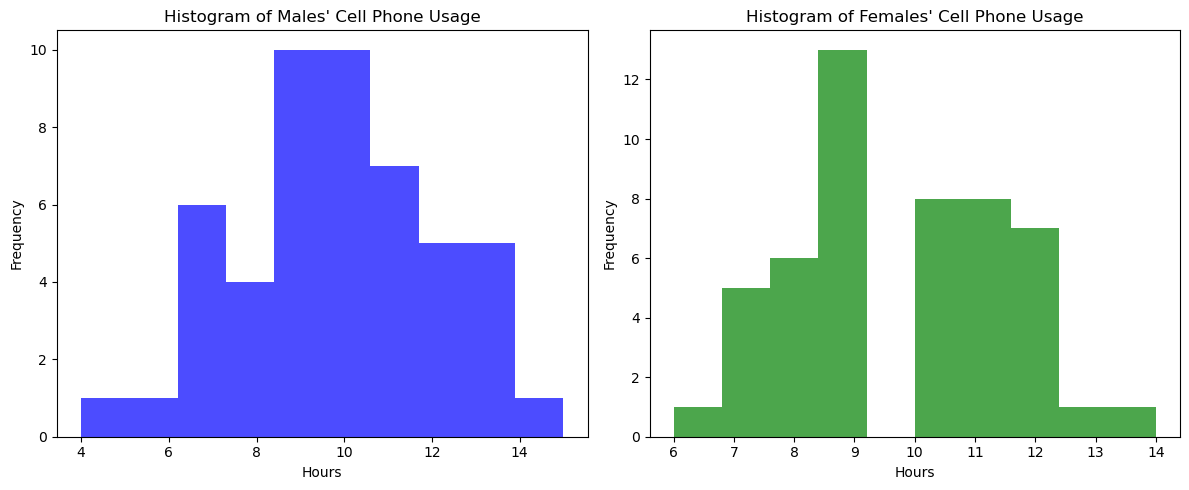

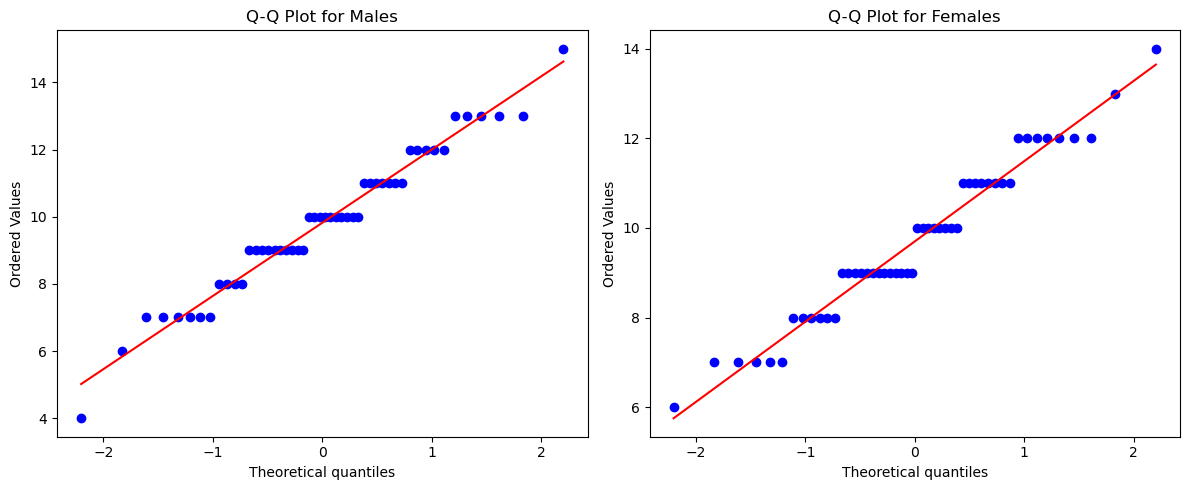

Shapiro-Wilk Test for Males: W = 0.9746539794869001 , p-value = 0.3539889622001458
Shapiro-Wilk Test for Females: W = 0.9638767847871548 , p-value = 0.12919719507959687


In [83]:
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.DataFrame({'Males': males, 'Females': females})

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Males'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Males\' Cell Phone Usage')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Females'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of Females\' Cell Phone Usage')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
stats.probplot(df['Males'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Males')

plt.subplot(1, 2, 2)
stats.probplot(df['Females'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Females')

plt.tight_layout()
plt.show()

shapiro_males = stats.shapiro(df['Males'])
shapiro_females = stats.shapiro(df['Females'])

print("Shapiro-Wilk Test for Males: W =", shapiro_males.statistic, ", p-value =", shapiro_males.pvalue)
print("Shapiro-Wilk Test for Females: W =", shapiro_females.statistic, ", p-value =", shapiro_females.pvalue)

c. **Equality of Variances (Homogeneity of Variance)**

Since the variances are not equal, we would use Welch's test, which does not assume equal variances.

Using the two-sample t-test:
- **t-statistic:** 0.304
- **p-value:** 0.762

Since the p-value (0.762) is higher than the significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the mean time spent on cell phones between male and female students.

As per full analyses from different questions above, the concised recommendations are:
- Further testing (increase the sample size)
- Control for other factors